# SMS Spam detection using Natural Language Processing

In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

Importing Dataset

In [4]:
rawdata = pd.read_csv('D:\\Documents\\Lynda\\NLP with Python\\Ex_Files_NLP_Python_ML_EssT\\Exercise Files\\Ch01\\01_02\\SMSSpamCollection.tsv', sep = '\t', header = None)
rawdata.columns = ["label", "body_text"]
rawdata.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


## Exploring Dataset

Structure of Dataset

In [6]:
print("Input data has {} rows and  {} columns".format(len(rawdata), len(rawdata.columns)))

Input data has 5568 rows and  2 columns


In [7]:
print("Number of HAM are {} and SPAM are {}". format(len(rawdata[rawdata["label"]=="ham"]), 
                                                     len(rawdata[rawdata["label"]=="spam"])))

Number of HAM are 4822 and SPAM are 746


In [8]:
print("Number of missing labels in the dataset are {}" .format(rawdata["label"].isnull().sum()))
print("Number of missing body_text in the dataset are {}" .format(rawdata["body_text"].isnull().sum()))

Number of missing labels in the dataset are 0
Number of missing body_text in the dataset are 0


Plotting Word cloud

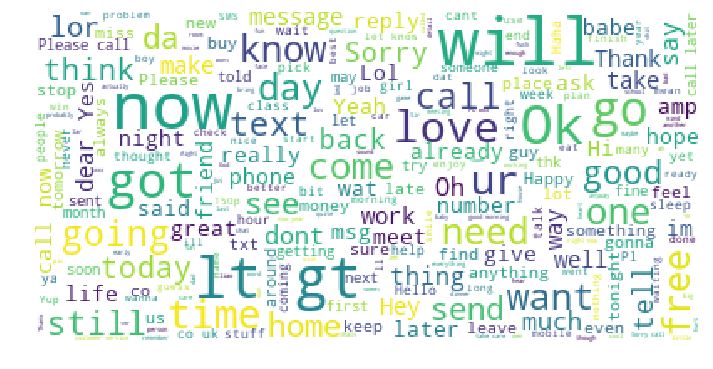

In [10]:
words = " ".join(rawdata['body_text'])
wordcloud = WordCloud(background_color = 'white', mode = "RGB",relative_scaling = 1.0, 
                      max_words=250, max_font_size = 40,
                      stopwords = STOPWORDS).generate(words)
fig = plt.figure(1, figsize=(12, 12)),
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Add column which calculates the percentage of punctuation in the text.

In [12]:
rawdata['body_len'] = rawdata['body_text'].apply(lambda x: len(x)-x.count(" "))

def count_punct(text): 
    count = sum([1 for word in text if word in string.punctuation])
    count_punct = round(count/(len(text)-text.count(" ")), 3)*100
    return count_punct
rawdata['body_punct'] = rawdata['body_text'].apply(lambda x: count_punct(x))

Plotting text length for spam and ham messages to observe difference in sms size.

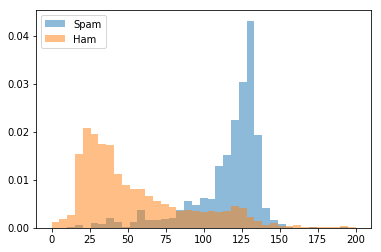

In [13]:
from matplotlib import pyplot
%matplotlib inline

bins = np.linspace(0, 200, 40)

pyplot.hist(rawdata[rawdata['label']=='spam']['body_len'], bins, alpha = 0.5, normed= True, label = 'Spam')
pyplot.hist(rawdata[rawdata['label']=='ham']['body_len'], bins, alpha = 0.5, normed =True, label = "Ham")
pyplot.legend(loc = 'upper left')
pyplot.show()

Plotting punctuation percent for spam and ham messages. We observe the distribution is almost same

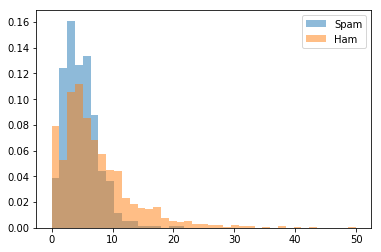

In [14]:
bins = np.linspace(0, 50, 40)

pyplot.hist(rawdata[rawdata['label']=='spam']['body_punct'], bins, alpha = 0.5, normed= True, label = 'Spam')
pyplot.hist(rawdata[rawdata['label']=='ham']['body_punct'], bins, alpha = 0.5, normed =True, label = "Ham")
pyplot.legend(loc = 'upper right')
pyplot.show()

## Data Cleaning

1. Remove Punctuation
2. Tokanize
3. Remove Stopwords
4. Lemmatize/Stem

In [15]:
import string
import re
stopwords = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()

def body_text_cleaned(text):
    no_punct = "".join([char for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word.lower() for word in tokens if word not in stopwords]
    text = [wn.lemmatize(word) for word in text]
    return text
    
rawdata['body_text_cleaned'] = rawdata['body_text'].apply(lambda x: body_text_cleaned(x))

rawdata.head(10)


,label,body_text,body_len,body_punct,body_text_cleaned
0,ham,I've been searching for the right words to tha...,160,2.5,"[i, searching, right, word, thank, breather, i..."
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1,"[nah, i, think, go, usf, life, around, though]"
3,ham,Even my brother is not like to speak with me. ...,62,3.2,"[even, brother, like, speak, they, treat, like..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1,"[i, have, a, date, on, sunday, with, will, ]"
5,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4,"[a, per, request, melle, melle, oru, minnaminu..."
6,spam,WINNER!! As a valued network customer you have...,132,4.5,"[winner, a, valued, network, customer, selecte..."
7,spam,Had your mobile 11 months or more? U R entitle...,126,1.6,"[had, mobile, 11, month, u, r, entitled, updat..."
8,ham,I'm gonna be home soon and i don't want to tal...,89,6.7,"[i, gonna, home, soon, want, talk, stuff, anym..."
9,spam,"SIX chances to win CASH! From 100 to 20,000 po...",111,7.2,"[six, chance, win, cash, from, 100, 20, 000, p..."


## Vectorizing Dataset

There are various methods to convert the text data into feature vectors,
We will use CountVectorizer and TF-IDF to see which will be more appropriate for our Spam detection dataset.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
countvect = CountVectorizer(analyzer = body_text_cleaned)
X_count = countvect.fit_transform(rawdata['body_text'])

X_count_dataframe = pd.DataFrame(X_count.toarray())
X_count_dataframe.columns = countvect.get_feature_names()
X_count_features = pd.concat([rawdata['body_len'], rawdata['body_punct'], X_count_dataframe], axis =1)
X_count_features.head()


,body_len,body_punct,,0,00,000,000pes,008704050406,0089,0121,...,zogtorius,zoom,zouk,zyada,èn,é,ú1,ü,〨ud,鈥
0,160,2.5,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,128,4.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,49,4.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,62,3.2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,7.1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvect = TfidfVectorizer(analyzer = body_text_cleaned)
X_tfidf = tfidfvect.fit_transform(rawdata['body_text'])

tfidf_dataframe = pd.DataFrame(X_tfidf.toarray())
tfidf_dataframe.colunms = tfidfvect.get_feature_names()
tfidf_features = pd.concat([rawdata['body_len'], rawdata['body_punct'], tfidf_dataframe], axis =1)
tfidf_features.head()

C:\Users\monis\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,body_len,body_punct,0,1,2,3,4,5,6,7,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,160,2.5,0.051244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,128,4.7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,49,4.1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,62,3.2,0.073398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,7.1,0.093329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Building Regression Classifier

In [19]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_features, rawdata['label'], test_size = 0.2)

rf = RandomForestClassifier(n_estimators = 50, max_depth = 50, n_jobs = -1)
rf_model = rf.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred, pos_label = 'spam', average = 'binary')

print("Precision: {}, Recall: {}, Accuracy: {} " .format(precision, round(recall, 3), round((y_pred == y_test).sum() / len(y_pred), 3) ))

Precision: 1.0, Recall: 0.83, Accuracy: 0.977 


Using Grid search to find parameters

In [22]:
# Using GridSearchCV for tfidf
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30,60,90,None]}
gs = GridSearchCV(rf, param, n_jobs = -1)
gs_fit = gs.fit(tfidf_features, rawdata['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending = False)[0:5]

C:\Users\monis\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\monis\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\monis\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\monis\Anaconda3\lib\site-packages\sklearn\utils\

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
7,26.241390,0.760189,0.979167,0.999820,90,150,"{'max_depth': 90, 'n_estimators': 150}",1,0.983306,0.999731,0.977371,0.999731,0.976819,1.000000,1.248588,0.104068,0.002937,0.000127
11,40.286972,0.559381,0.978807,1.000000,None,300,"{'max_depth': None, 'n_estimators': 300}",2,0.979537,1.000000,0.979526,1.000000,0.977358,1.000000,4.399191,0.166642,0.001024,0.000000
8,51.634541,0.947688,0.978269,0.999820,90,300,"{'max_depth': 90, 'n_estimators': 300}",3,0.978460,0.999731,0.978987,0.999731,0.977358,1.000000,3.824929,0.153970,0.000678,0.000127
3,3.432694,0.379351,0.977550,0.997576,60,10,"{'max_depth': 60, 'n_estimators': 10}",4,0.981152,0.997844,0.976832,0.998922,0.974663,0.995960,0.202295,0.082326,0.002698,0.001224
4,23.277389,0.725623,0.977550,0.998114,60,150,"{'max_depth': 60, 'n_estimators': 150}",4,0.980075,0.998653,0.977909,0.998653,0.974663,0.997037,0.694565,0.056262,0.002224,0.000762


In [23]:
# Using GridSearchCV for count vectorizer
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30,60,90,None]}
gs = GridSearchCV(rf, param, n_jobs = -1)
gs_fit = gs.fit(X_count_features, rawdata['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending = False)[0:5]

C:\Users\monis\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\monis\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\monis\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\monis\Anaconda3\lib\site-packages\sklearn\utils\

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
8,54.121871,0.880871,0.977371,0.999820,90,300,"{'max_depth': 90, 'n_estimators': 300}",1,0.978998,0.999461,0.976832,1.000000,0.976280,1.000000,4.146814,0.043480,0.001173,0.000254
11,40.825467,0.711636,0.977371,1.000000,None,300,"{'max_depth': None, 'n_estimators': 300}",1,0.978998,1.000000,0.976293,1.000000,0.976819,1.000000,5.518505,0.131386,0.001171,0.000000
5,46.476287,0.964941,0.977011,0.997486,60,300,"{'max_depth': 60, 'n_estimators': 300}",3,0.979537,0.997575,0.975216,0.998114,0.976280,0.996768,3.565015,0.087155,0.001839,0.000553
10,27.932893,0.699595,0.976832,1.000000,None,150,"{'max_depth': None, 'n_estimators': 150}",4,0.979537,1.000000,0.974677,1.000000,0.976280,1.000000,1.411011,0.127540,0.002022,0.000000
7,27.808498,0.870571,0.976652,0.999731,90,150,"{'max_depth': 90, 'n_estimators': 150}",5,0.981152,0.999461,0.975216,1.000000,0.973585,0.999731,0.964911,0.156499,0.003252,0.000220


# Gradient Boosting

In [33]:
 # Gradient Boosting with grid search for tfidf vectorizer.
    
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
param = {'n_estimators': [100,150],
        'max_depth':[7,11,15],
        'learning_rate':[0.1]
        }
gs = GridSearchCV(gb, param, cv=5, n_jobs = -1)
cv_fit = gs.fit(tfidf_features, rawdata['label'])
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]
 

C:\Users\monis\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\monis\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\monis\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\monis\Anaconda3\lib\site-packages\sklearn\utils\

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
5,461.374839,0.234532,0.975216,1.0,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",1,0.971300,...,0.977538,1.0,0.971249,1.0,0.973046,1.0,13.685851,0.053582,0.004493,0.0
1,290.905121,0.359540,0.974677,1.0,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",2,0.972197,...,0.976640,1.0,0.974843,1.0,0.970350,1.0,9.211692,0.077640,0.003182,0.0
2,324.480785,0.322960,0.974318,1.0,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",3,0.970404,...,0.976640,1.0,0.971249,1.0,0.973046,1.0,3.083858,0.031048,0.003660,0.0
4,400.391627,0.289227,0.974318,1.0,0.1,15,100,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",3,0.969507,...,0.975741,1.0,0.973046,1.0,0.972147,1.0,26.722279,0.020283,0.003955,0.0
0,197.678577,0.279257,0.974138,1.0,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",5,0.971300,...,0.974843,1.0,0.974843,1.0,0.969452,1.0,5.289371,0.031085,0.003698,0.0


In [34]:
 # Gradient Boosting with grid search for count vectorizer.
    
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
param = {'n_estimators': [100,150],
        'max_depth':[7,11,15],
        'learning_rate':[0.1]
        }
gs = GridSearchCV(gb, param, cv=5, n_jobs = -1)
cv_fit = gs.fit(X_count_features, rawdata['label'])
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]
 

C:\Users\monis\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\monis\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\monis\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\monis\Anaconda3\lib\site-packages\sklearn\utils\

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_learning_rate,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
3,445.643453,0.404191,0.976473,1.00000,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",1,0.970404,...,0.979335,1.0,0.971249,1.0,0.976640,1.000000,10.259507,0.046452,0.005305,0.00000
2,313.197504,0.284191,0.975934,1.00000,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",2,0.968610,...,0.977538,1.0,0.973046,1.0,0.977538,1.000000,16.947830,0.020318,0.004824,0.00000
1,286.471913,0.433185,0.975395,1.00000,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",3,0.970404,...,0.978437,1.0,0.971249,1.0,0.973944,1.000000,8.145420,0.048864,0.004701,0.00000
4,418.974473,0.347096,0.975216,1.00000,0.1,15,100,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",4,0.971300,...,0.976640,1.0,0.970350,1.0,0.974843,1.000000,16.041542,0.083176,0.004493,0.00000
0,199.226976,0.289091,0.975036,0.99991,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",5,0.971300,...,0.975741,1.0,0.969452,1.0,0.976640,0.999776,4.336179,0.017228,0.004413,0.00011


## Choosing model, data preparation and results 

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(rawdata[['body_text', 'body_len', 'body_punct']], rawdata['label'], test_size = 0.2)


Vectorize Text

In [36]:
tfidf_vect = TfidfVectorizer(analyzer = body_text_cleaned)
tfidf_vect_fit = tfidf_vect.fit(X_train['body_text'])

tfidf_train = tfidf_vect_fit.transform(X_train['body_text'])
tfidf_test = tfidf_vect_fit.transform(X_test['body_text'])

X_train_vect = pd.concat([X_train[['body_len', 'body_punct']].reset_index(drop = True),
          pd.DataFrame(tfidf_train.toarray())], axis =1)

X_test_vect = pd.concat([X_test[['body_len', 'body_punct']].reset_index(drop = True),
          pd.DataFrame(tfidf_test.toarray())], axis =1)

#This vectorizer is trained only on training set

Final Evaluation

In [37]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

#choose parameters from gridsearch
rf = RandomForestClassifier(n_estimators = 150, max_depth =  90, n_jobs = -1)

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = end-start

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = end - start

precision, recall, fscore, support = score(y_test, y_pred, pos_label = 'spam', average = 'binary')
print("Fit time: {}, Predict time: {} ------------ Precision: {}, Recall: {}, Accuracy: {} " 
      .format(round(fit_time,3), round(pred_time,3), round(precision,3), round(recall, 3), round((y_pred == y_test).sum() / len(y_pred), 3) ))

Fit time: 3.544, Predict time: 0.315 ------------ Precision: 1.0, Recall: 0.865, Accuracy: 0.982 


In [38]:
gb = GradientBoostingClassifier(n_estimators = 150, max_depth = 15)

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = end-start

start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = end - start
             
precision, recall, fscore, support = score(y_test, y_pred, pos_label = 'spam', average = 'binary')
print("Fit time: {}, Predict time: {} ------------ Precision: {}, Recall: {}, Accuracy: {} " 
      .format(round(fit_time,3), round(pred_time,3), round(precision,3), round(recall, 3), round((y_pred == y_test).sum() / len(y_pred), 3) ))                              

Fit time: 288.869, Predict time: 0.185 ------------ Precision: 0.95, Recall: 0.892, Accuracy: 0.979 


Gradient boosting is a better fit as predict time is almost half of random forest, with little compromise on accuracy. 